# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
# Почему-то выдавало ошибку "module 'matplotlib' has no attribute 'show'", если не записать импорт именно так:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/datasets/real_estate_data.csv')

In [2]:
# Посмотрим инфо и первые 20 строк
df.info()
display(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


In [3]:
# Разделение столбца на отдельные столбцы
df = df['total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition'].str.split('\t', expand=True)

# Добавление названий столбцов
df.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

In [4]:
# Преобразовываем в числовой формат все столбцы, кроме даты и названия "локации"
columns_to_convert = ['total_images', 'last_price', 'total_area', 'rooms',
                      'ceiling_height', 'floors_total', 'living_area', 'floor', 'is_apartment',
                      'studio', 'open_plan', 'kitchen_area', 'balcony', 'airports_nearest',
                      'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',
                      'ponds_nearest', 'days_exposition']

# Преобразование в числовой формат только для указанных столбцов
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [5]:
# Посмотрим инфо и первые 20 строк ещё раз
df.info()
display(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          0 non-null      float64
 10  studio                0 non-null      float64
 11  open_plan             0 non-null      float64
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


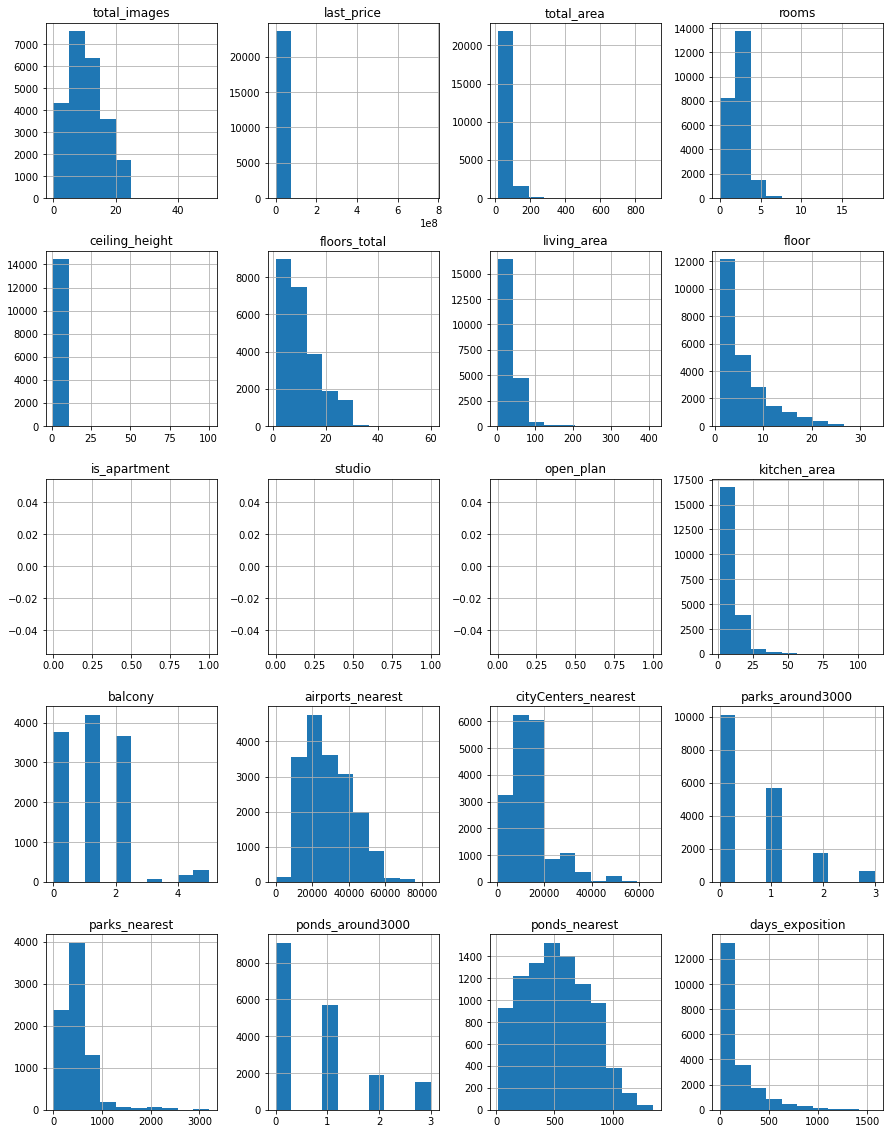

In [6]:
# Построим гистограммы
df.hist(figsize=(15, 20))

plt.show()

In [7]:
# Посмотрим дубликаты
df.duplicated().sum()

0

In [8]:
# Посмотрим мин/макс значения
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
is_apartment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


last_price: Минимальная цена квартиры 23699 руб что невозможно мало, а максимальная 763 000 000 руб, что очень много, и хоть и возможно, но негативно сказывается на репрезентативности среднего значения, а значит лучше исключить

kitchen_area: Минимальная площадь кухни 1,3 м² - явно ошибка. Исключить

ceiling_height: Минимальная высота потолков 1, а максимальная - 100 метровю. Исключить

living_area: Минимальная жилая площадь 2 м² это скорее всего ошибка. Исключить

Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения

### Выполните предобработку данных

In [9]:
# Приведем имена столбцов к единому стилю
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбцы приведены к правильному типу данных

In [10]:
# Определение пропущенных значений
missing_values = df.isnull().sum()
print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            23699
studio                  23699
open_plan               23699
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


<div class="alert alert-info">
<b>Есть много столбцов с пропусками, которые нужно заменить/объяснить</b> 
</div>

# Заменяем пропуски там, где это необходимо

In [11]:
# Удаляем записи, где отсутствует "локация" и количество этажей
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)

In [12]:
# Квартира или нет
df['is_apartment'].fillna(False, inplace=True)
# Если количество балконов не указано - скорее всего их просто нет, ставим 0
df['balcony'].fillna(0, inplace=True)

In [13]:
# Заполняем пропуски высоты потолков медианным значением по населенным пунктам
for locality in df['locality_name'].unique():
    median_value = df.loc[df['locality_name'] == locality, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality), 'ceiling_height'].median()

df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

# Заполняем пропуски удаленности от центра медианным значением по населенным пунктам
for locality in df['locality_name'].unique():
    median_value = df.loc[df['locality_name'] == locality, 'city_centers_nearest'].median()
    df.loc[(df['city_centers_nearest'].isna()) & (df['locality_name'] == locality), 'city_centers_nearest'].median()

df.loc[df['city_centers_nearest'].isna(), 'city_centers_nearest'] = df['city_centers_nearest'].median()

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошая работа по заполнениию пропуоскв, молодец.

living_area: Вероятно, пользователи не помнят/не знают точную площадь, поэтому не пишут ее.
    Данные по этому столбцу нам нужны, но заполнить пропуски нечем
    (можно медианой, но я не уверен, что тогда можно будет точно ответить на вопрос о средней жил. площади,
    используя данные без пропусков (они, мне кажутся более релевантными), так что оставим их

kitchen_area: Наверное, пользователи не указывают точный метраж кухни, т.к. не знают его.
     Рассуждения аналогичны предыдущим, пропуски оставляем

airports_nearest: Пропуски возникли в связи с отсутствием картографических данных. Пропуски оставляем
     
parks_around_3000 и ponds_around_3000: Значения пропусков совпадают,
     скорее всего потому, что для этих объектов не была получена информация на основе картографических данных.
     Эти пропуски ни на что не влияют, так что можно их оставить

parks_nearest и ponds_nearest: Более половины объектов не имеют информации о ближайшем парке и водоеме.
     Рассуждения аналогичны предыдущим, пропуски оставляем

days_exposition: Эти данные должны быть получены автоматом, но пропуски всё же есть.
     Скорее всего виной тому техническая ошибка, но так как эти данные важны для исследования, а заполнить их нечем -
     оставим пропуски.


<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

# Преобразуем типы данных

In [14]:
# Преобразуем столбцы 'last_price', и 'floors_total' 'balcony' к типу данных int
df['last_price'] = df['last_price'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)

# преобразуем first_day_exposition к типу datetime с помощью pd.to_datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Квартира?
df['is_apartment'] = df['is_apartment'].astype('boolean')
df['is_apartment'].fillna(False, inplace=True)
# Студия?
df['studio'] = df['studio'].astype('boolean')
df['studio'].fillna(False, inplace=True)
# Открытая планировка?
df['open_plan'] = df['open_plan'].astype('boolean')
df['open_plan'].fillna(False, inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Типы данных приведены верно!

In [15]:
# Проверяем все столбцы
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                         boolean
open_plan                      boolean
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [16]:
# Определение пропущенных значений ешё раз
missing_values = df.isnull().sum()
print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name               0
airports_nearest         5532
city_centers_nearest        0
parks_around_3000        5508
parks_nearest           15568
ponds_around_3000        5508
ponds_nearest           14552
days_exposition          3172
dtype: int64


# Уберем дубликаты из списка названий населённых пунктов

In [17]:
# Выведем уникальные значения locality_name
df['locality_name'].sort_values().unique()

array(['', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок С

In [18]:
# заменяем поселок на посёлок
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')
df['locality_name'].sort_values().unique()

array(['', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок

In [19]:
# Приведем "локации" к одному значению
df = df.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})
df['locality_name'].sort_values().unique()

array(['', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейз

In [20]:
# Удалим строки без города, чтобы они не мешали (не понятно, где это вообще)
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошая работа. Отмечу только, что на мой взгляд лучше еще заменить все буквы "ё" на "е", а также привести все значениия к ниижнемму региистру. Так, возможно, часть дублей срежется

# Разбираемся с высотой потолков

In [21]:
# Просматриваем столбец
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Встречаются значения высоты потолков 20-30 метров, что странно. Скорее всего это ошибки в вещественных значениях: 2-3 метра. Следовательно нужно просто поделить такие значения на 10

In [22]:
# Делим всё, что выше 20 метров
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10
# И проверяем
df['ceiling_height'].describe().T

count    23613.000000
mean         2.698849
std          0.253641
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

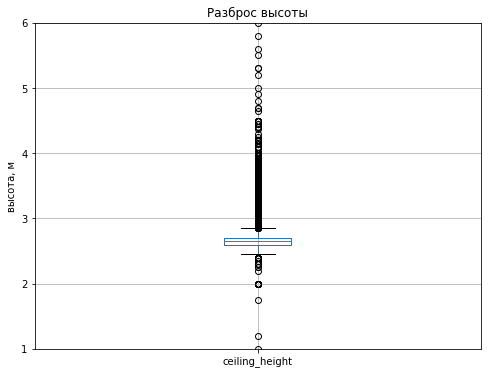

In [23]:
# Построим диаграмму разброса высоты
df.boxplot(column='ceiling_height', figsize=(8, 6))
plt.title('Разброс высоты')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

In [24]:
# Оставим строки с высотой потолков от 2,5 до 5 метров
df = df.query('2.5 <= ceiling_height <= 5', engine='python')

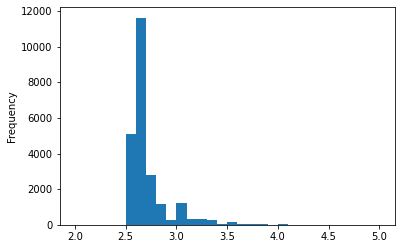

In [25]:
# График для проверки
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2, 5))
plt.show()

Вывод : сделали предобработку данных, а именно:

Изменили типы данных,
привели имена столбцов к единому стилю,
обработали явные и неявные дубликаты,
также обработали пропуски.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Поддерживаю работу с высотой потолков

### Добавьте в таблицу новые столбцы

Добавим столбец price_one_square_meter

In [26]:
# Добавим столбец с ценой за 1м²
df['price_one_square_meter'] = df['last_price'] / df['total_area']

# Округлим полученную цену
df['price_one_square_meter'] = df['price_one_square_meter'].round(2)

In [27]:
# Проверим
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter
9024,2,7986000,75.3,2017-03-21,2,2.65,11,40.4,8,False,...,0,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,270.0,106055.78
4636,15,3700000,34.4,2018-01-11,1,2.55,16,NaN,9,False,...,0,Санкт-Петербург,21297.0,14515.0,1.0,835.0,2.0,839.0,105.0,107558.14
8790,13,10500000,107.7,2017-07-05,3,2.75,16,59.7,14,False,...,5,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,97.0,97493.04
18393,4,8750000,95.0,2018-06-01,4,3.23,5,69.1,2,False,...,0,Санкт-Петербург,22430.0,3695.0,0.0,NaN,1.0,694.0,298.0,92105.26
22163,4,3899000,55.0,2017-11-22,2,2.50,14,31.0,1,False,...,0,Колпино,25413.0,31199.0,0.0,NaN,1.0,999.0,170.0,70890.91
10112,4,3850000,41.3,2018-02-09,1,2.65,24,16.0,5,False,...,2,посёлок Парголово,53554.0,19107.0,0.0,NaN,0.0,NaN,49.0,93220.34
18713,20,23000000,240.0,2015-01-21,4,3.69,6,NaN,4,False,...,1,Санкт-Петербург,22633.0,4353.0,1.0,303.0,0.0,NaN,NaN,95833.33
4084,5,4450000,40.0,2017-02-03,1,2.65,10,17.0,9,False,...,0,Санкт-Петербург,28107.0,11878.0,0.0,NaN,1.0,447.0,39.0,111250.00
14324,4,6000000,72.0,2017-05-04,3,2.70,5,45.0,5,False,...,1,Петергоф,39858.0,32539.0,0.0,NaN,0.0,NaN,60.0,83333.33
496,11,13460000,136.2,2019-02-27,4,3.00,6,99.5,5,False,...,0,Санкт-Петербург,25997.0,4699.0,1.0,816.0,1.0,1251.0,NaN,98825.26


Добавим столбец exposition_weekday, exposition_month, exposition_year

In [28]:
# Добавим столбец с днем недели публикации объявления
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
df['exposition_month'] = df['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
df['exposition_year'] = df['first_day_exposition'].dt.year

In [29]:
# Проверим
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
20337,13,6750000,76.1,2016-11-30,3,2.65,16,44.0,8,False,...,13093.0,NaN,NaN,NaN,NaN,508.0,88699.08,2,11,2016
14649,11,12990000,106.0,2018-07-08,6,2.65,4,NaN,1,False,...,3655.0,0.0,NaN,1.0,361.0,90.0,122547.17,6,7,2018
13546,5,11000000,120.0,2016-02-24,4,3.28,6,73.5,4,False,...,4651.0,1.0,533.0,1.0,796.0,253.0,91666.67,2,2,2016
21124,17,4180000,50.0,2017-04-10,2,3.00,3,27.6,2,False,...,17279.0,1.0,590.0,0.0,NaN,65.0,83600.00,0,4,2017
9684,11,12500000,75.0,2017-10-11,2,3.10,6,42.0,3,False,...,9380.0,0.0,NaN,2.0,656.0,213.0,166666.67,2,10,2017
10573,14,1670000,39.0,2018-02-01,2,2.50,4,29.0,2,False,...,13093.0,NaN,NaN,NaN,NaN,42.0,42820.51,3,2,2018
2613,12,6750000,68.0,2019-04-19,3,2.50,6,47.0,5,False,...,15820.0,0.0,NaN,0.0,NaN,NaN,99264.71,4,4,2019
18234,12,2700000,33.0,2015-12-01,1,2.65,5,18.0,3,False,...,13093.0,NaN,NaN,NaN,NaN,222.0,81818.18,1,12,2015
21010,14,2050000,39.4,2018-02-03,1,2.60,5,17.1,4,False,...,13093.0,NaN,NaN,NaN,NaN,312.0,52030.46,5,2,2018
21676,20,23600000,181.3,2017-07-10,4,3.50,7,164.7,7,False,...,5605.0,3.0,484.0,1.0,305.0,NaN,130170.99,0,7,2017


Добавим столбец с категоризацие по этажам floor_category

In [30]:
# Функция для категоризации этажности в доме
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

# Добавляем столбец с категорией этажа квартиры
df['floor_category'] = df.apply(get_floor_category, axis=1)

In [31]:
# Проверим
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
4390,4,1700000,34.0,2017-07-11,1,2.65,2,17.0,1,False,...,NaN,NaN,NaN,NaN,598.0,50000.00,1,7,2017,первый
21459,19,7300000,45.0,2017-12-01,1,2.80,16,18.0,11,False,...,1.0,744.0,1.0,1157.0,74.0,162222.22,4,12,2017,другой
609,9,5100000,44.0,2018-10-02,1,2.60,16,17.0,11,False,...,0.0,NaN,0.0,NaN,137.0,115909.09,1,10,2018,другой
20998,9,3950000,65.8,2018-09-05,2,2.70,8,38.0,6,False,...,NaN,NaN,NaN,NaN,222.0,60030.40,2,9,2018,другой
9941,8,2050000,29.9,2016-03-24,1,2.65,5,17.0,5,False,...,NaN,NaN,NaN,NaN,643.0,68561.87,3,3,2016,последний
18101,1,4500000,75.6,2017-10-13,2,2.77,13,30.0,2,False,...,1.0,1423.0,3.0,381.0,89.0,59523.81,4,10,2017,другой
6834,20,4700000,47.0,2018-10-03,2,2.50,9,28.2,8,False,...,0.0,NaN,0.0,NaN,49.0,100000.00,2,10,2018,другой
9214,20,3990000,54.5,2017-11-08,2,2.75,18,28.0,10,False,...,NaN,NaN,NaN,NaN,15.0,73211.01,2,11,2017,другой
4150,5,2995000,32.1,2017-05-29,1,2.65,9,17.9,9,False,...,1.0,45.0,0.0,NaN,50.0,93302.18,0,5,2017,последний
19972,20,4361004,62.4,2015-09-20,2,2.65,24,33.1,21,False,...,0.0,NaN,1.0,374.0,278.0,69887.88,6,9,2015,другой


Добавим столбец city_centers_nearest_km

In [32]:
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)

In [33]:
# Проверим
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
19165,17,9250000,113.0,2018-09-11,4,2.70,25,62.5,2,False,...,NaN,0.0,NaN,220.0,81858.41,1,9,2018,другой,14.0
7773,3,3600000,33.0,2018-01-17,1,2.65,14,17.0,9,False,...,NaN,0.0,NaN,55.0,109090.91,2,1,2018,другой,13.0
18245,20,5100000,79.4,2017-11-28,3,2.65,9,NaN,1,False,...,NaN,NaN,NaN,80.0,64231.74,1,11,2017,первый,13.0
4335,8,3800000,46.3,2017-09-13,2,2.65,9,29.0,2,False,...,649.0,1.0,761.0,84.0,82073.43,2,9,2017,другой,11.0
17046,20,5500000,57.2,2017-05-19,3,2.60,10,39.2,7,False,...,543.0,2.0,575.0,148.0,96153.85,4,5,2017,другой,13.0
14890,8,14500000,162.4,2016-03-30,5,3.40,5,118.9,5,False,...,349.0,0.0,NaN,413.0,89285.71,2,3,2016,последний,5.0
20278,2,2450000,35.0,2015-11-30,1,2.65,6,16.0,1,False,...,NaN,NaN,NaN,553.0,70000.00,0,11,2015,первый,13.0
4000,3,3800000,42.0,2019-03-23,2,2.50,5,27.0,1,False,...,NaN,0.0,NaN,NaN,90476.19,5,3,2019,первый,13.0
17275,9,6500000,71.9,2019-02-21,3,2.56,10,42.8,2,False,...,NaN,0.0,NaN,59.0,90403.34,3,2,2019,другой,15.0
18632,20,3590000,68.0,2017-10-07,2,2.60,10,39.3,7,False,...,NaN,NaN,NaN,118.0,52794.12,5,10,2017,другой,13.0


Вывод: Добавили необходимые столбцы и произвели расчеты по ним. Отметим, что из-за пропусков в исходных данных, в расчетных значениях также есть пропуски. В столбце floor_category для 85 строк категория этажа могла определиться неверно (вместо последний -> другой), т.к. значения количества этажей для этих объектов отсутствуют. Но так как что возможных ошибок крайне мала, на результаты исследования они не повлияют

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Столбцы добаавлены верно. Молодец

### Проведите исследовательский анализ данных

# Изучение параметров объектов недвижимости

Общая площадь

In [34]:
# Посмторим описательную часть для этого столбца
df['total_area'].describe().T

count    23523.000000
mean        60.339131
std         35.550768
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

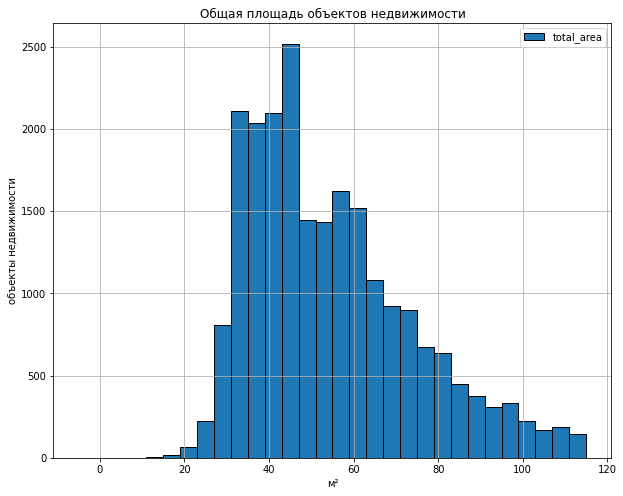

In [35]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['total_area'].quantile(.25) # первый квартиль Q1
q3 = df['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['total_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон примерно до 115 м², исключая выбросы. Большая часть объектов недвижимости имеют площадь от 30 до 65 м².
Самый распространенный вариант - около 45 м².
Площадь объектов более 100 м² встречается редко.
С площадью меньше 30 м² также редкость.
Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений

Жилая площадь

In [36]:
# Посмторим описательную часть для этого столбца
df['living_area'].describe()

count    21661.000000
mean        34.457664
std         22.007837
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

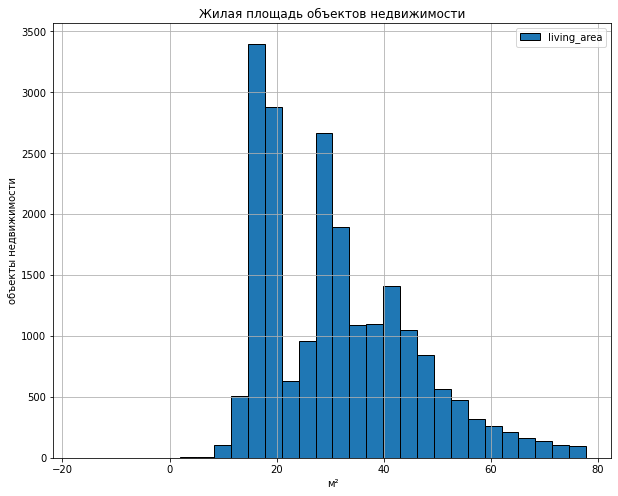

In [37]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['living_area'].quantile(.25) # первый квартиль Q1
q3 = df['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Жилая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 78 м², исключая выбросы.
Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м².
Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко.
С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м².
У графика также наблюдается небольшое смещение в сторону редких, но больших значений

Площадь кухни

In [38]:
# Посмторим описательную часть для этого столбца
df['kitchen_area'].describe().T

count    21304.000000
mean        10.568936
std          5.897318
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

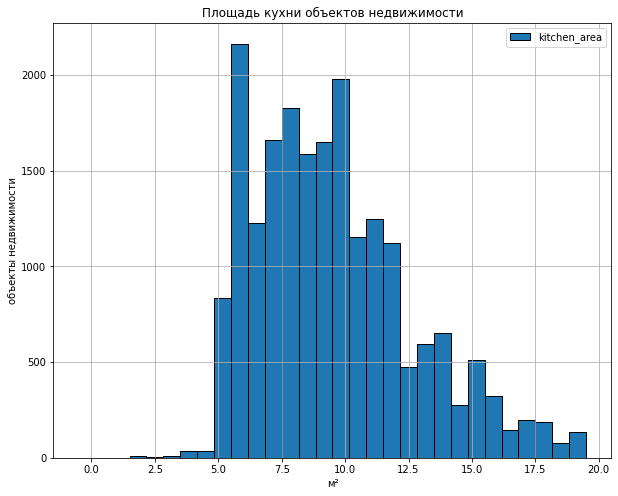

In [39]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = df['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
df['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Площадь кухни объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон до примерно 19 м², исключая выбросы. 
Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м².
Самый распространенный вариант - около 5,5 м². Площадь кухни более 13 м² встречается редко.
Площадь кухни менее 5 м² также редкость. Среднее значение - 10,5 м², медиана 9,1 м².
У графика также наблюдается небольшое смещение в сторону редких, но больших значений

Цена объекта

In [40]:
# Посмторим описательную часть для этого столбца
df['last_price'].describe().T

count    2.352300e+04
mean     6.532347e+06
std      1.083831e+07
min      1.219000e+04
25%      3.429000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

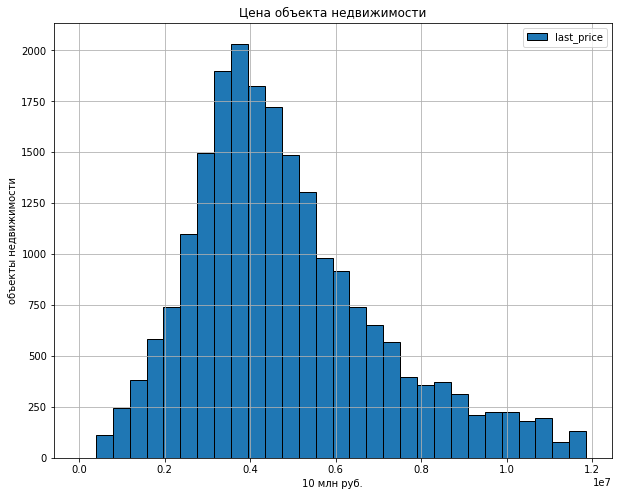

In [41]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['last_price'].quantile(.25) # первый квартиль Q1
q3 = df['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
df['last_price'].hist(bins=30, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Цена объекта недвижимости')
plt.xlabel('10 млн руб.')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон до примерно 12 млн руб., исключая выбросы. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшое смещение в сторону редких, но больших значений

Количество комнат

In [42]:
# Посмторим описательную часть для этого столбца
df['rooms'].describe().T

count    23523.000000
mean         2.071079
std          1.078485
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

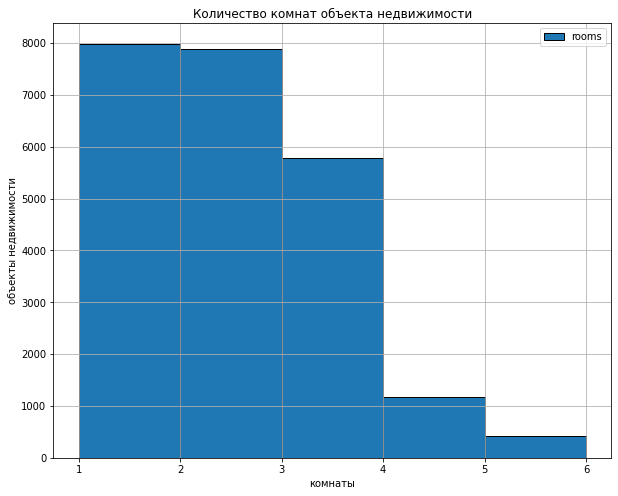

In [43]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = df['rooms'].quantile(.25) # первый квартиль Q1
q3 = df['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
df['rooms'].hist(bins=5, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Количество комнат объекта недвижимости')
plt.xlabel('комнаты')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение

Высота потолков

In [44]:
# Посмторим описательную часть для этого столбца
df['ceiling_height'].describe().T

count    23523.000000
mean         2.697250
std          0.215352
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

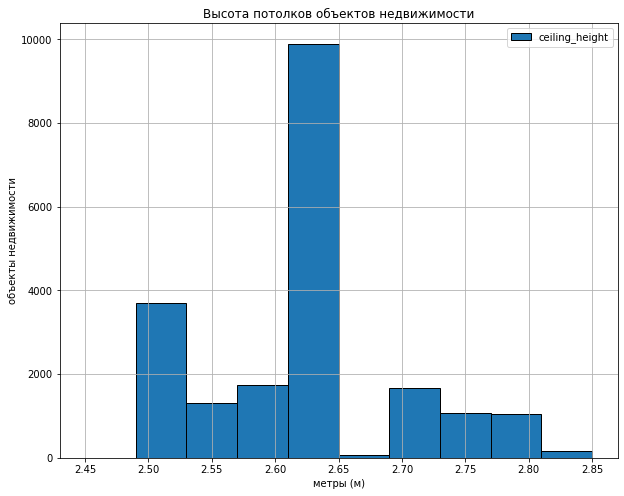

In [45]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = df['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму высоты потолков
df['ceiling_height'].hist(bins=10, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Высота потолков объектов недвижимости')
plt.xlabel('метры (м)')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваем диапазон от 2,5 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м(большинство). Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны

Этаж квартиры

In [46]:
# Посмторим описательную часть для этого столбца
df['floor'].describe().T


count    23523.000000
mean         5.881818
std          4.878097
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

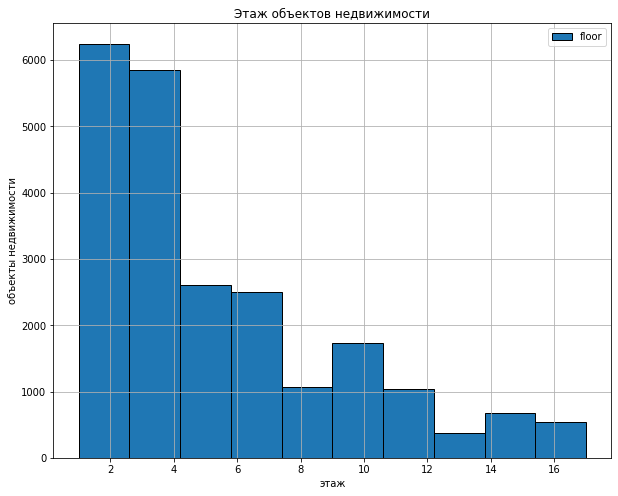

In [47]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['floor'].quantile(.25) # первый квартиль Q1
q3 = df['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
df['floor'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж

Тип этажа квартиры («первый», «последний», «другой»)

In [48]:
# Посмотрим как мы обозначили столбец с категоризацией по типу квартиры
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [49]:
# Вызовем describe
df['floor_category'].describe().T

count      23523
unique         3
top       другой
freq       17311
Name: floor_category, dtype: object

In [50]:
# Посмотрим на кол-во в каждой категории
df['floor_category'].value_counts()

другой       17311
последний     3313
первый        2899
Name: floor_category, dtype: int64

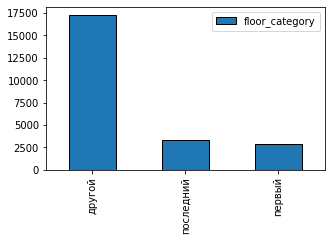

In [51]:
# Отобразим это на графике
df['floor_category'].value_counts().plot.bar(figsize=(5, 3), ec='black', legend=True)
plt.show()

Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним

Общее количество этажей в доме

In [52]:
# Выведем описательную статистику для столбца
df['floors_total'].describe()

count    23523.000000
mean        10.684819
std          6.599784
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

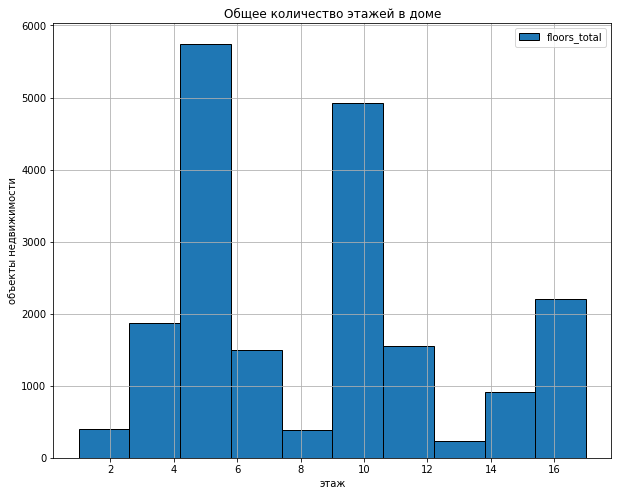

In [53]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['floor'].quantile(.25) # первый квартиль Q1
q3 = df['floor'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму общего кол-ва этажей в доме
df['floors_total'].hist(bins=10, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж

Расстояние до центра города в метрах

In [54]:
# Выведем описательную статистику для столбца
df['city_centers_nearest'].describe()

count    23523.000000
mean     13931.251414
std       7559.417635
min        181.000000
25%      10915.000000
50%      13093.000000
75%      15245.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

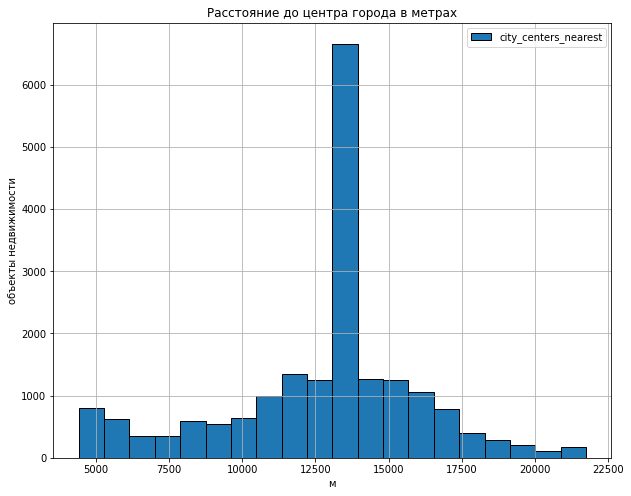

In [55]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['city_centers_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['city_centers_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
df['city_centers_nearest'].hist(bins=20, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 3000 до 22000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км

Расстояние до ближайшего аэропорта

In [56]:
# Уберем значения равные 0 
df = df.query('airports_nearest != 0')

In [57]:
# Выведем описательную статистику для столбца
df['airports_nearest'].describe()

count    18022.000000
mean     28796.540783
std      12627.658482
min       6450.000000
25%      18576.000000
50%      26743.500000
75%      37271.750000
max      84869.000000
Name: airports_nearest, dtype: float64

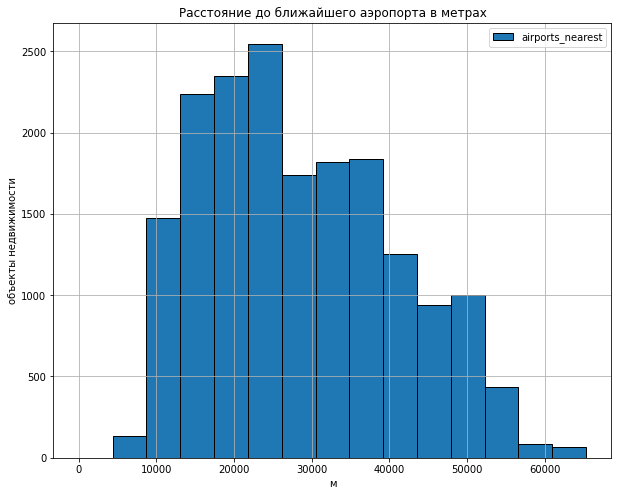

In [58]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['airports_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['airports_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
df['airports_nearest'].hist(bins=15, range=(0, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 0 до 65000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,7 км

Расстояние до ближайшего парка в метрах

In [59]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [60]:
# Посмотрим описательную статистику
df['parks_nearest'].describe().T

count    8008.000000
mean      490.657967
std       341.903198
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

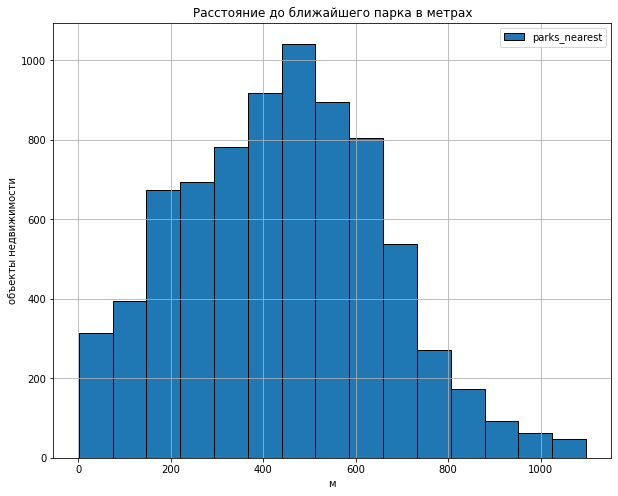

In [61]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['parks_nearest'].quantile(.25) # первый квартиль Q1
q3 = df['parks_nearest'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR


# Построим гистограмму этажа квартиры
df['parks_nearest'].hist(bins=15, range=(1, (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м

День и месяц публикации объявления

In [62]:
# Посмотрим описательную статистику
df['exposition_weekday'].describe().T

count    23522.000000
mean         2.568106
std          1.787977
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: exposition_weekday, dtype: float64

In [63]:
# Посмотрим кол-во объявлений по каждому дню недели
df['exposition_weekday'].value_counts().sort_values()

6    1678
5    1920
0    3584
2    3941
4    3974
1    4157
3    4268
Name: exposition_weekday, dtype: int64

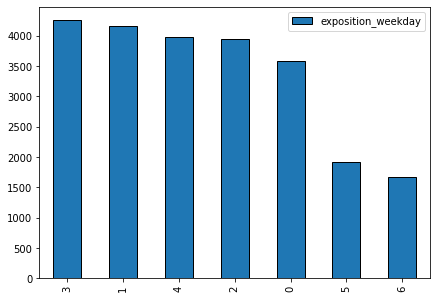

In [64]:
# Отобразим это на графике
df['exposition_weekday'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни

In [65]:
# Посмотрим описательную статистику
df['exposition_month'].describe().T

count    23522.000000
mean         6.399201
std          3.493430
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

In [66]:
# Посмотрим кол-во объявлений по каждому дню недели
df['exposition_month'].value_counts().sort_values()

5     1259
1     1491
12    1636
7     1684
8     1733
6     1745
9     1966
10    2102
11    2353
4     2354
3     2571
2     2628
Name: exposition_month, dtype: int64

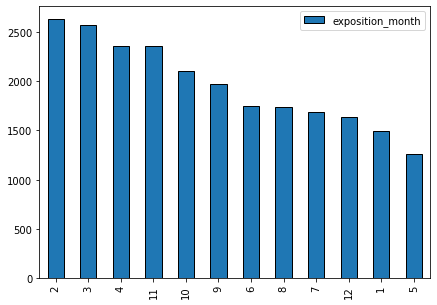

In [67]:
# Отобразим это на графике
df['exposition_month'].value_counts().plot.bar(figsize=(7, 5), ec='black', legend=True)
plt.show()

По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней

Вывод:

Мы получили представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка около 500 метров

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлчиные исследования параметров, молодец! Отммечу, что было важно использовать описательную статиистику, что и было сдлеано. Моя рекомендация - не сортировать графики с датой (месяц, день недели) - так проще отследить динамику

# Проанализируем время продажи квартиры

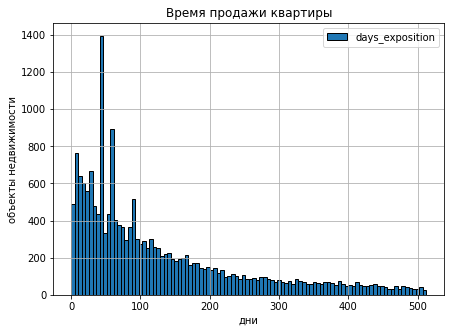

In [68]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = df['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = df['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи квартиры
df['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

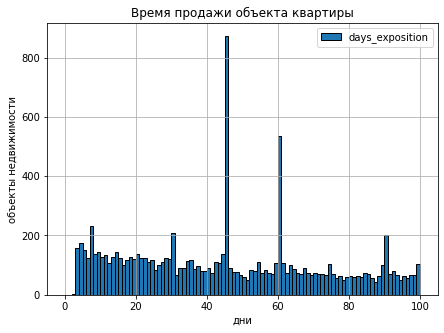

In [69]:
# Ограничим гистограмму периодом до 100 дней
df['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5), ec='black', legend=True)
plt.title('Время продажи объекта квартиры')
plt.xlabel('дни')
plt.ylabel('объекты недвижимости')
plt.show()

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Но тут важно учесть, что возможно квартира не продана, а просто закрылось объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено

In [70]:
# Получим описательную статистику столбца days_exposition
df['days_exposition'].describe().T

count    20363.000000
mean       180.957177
std        219.854887
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней.* *Смотря на график, можно увидеть длиный "хвост". Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов. Чтобы посмотреть на всю эту красоту нужно построить диаграмму размаха

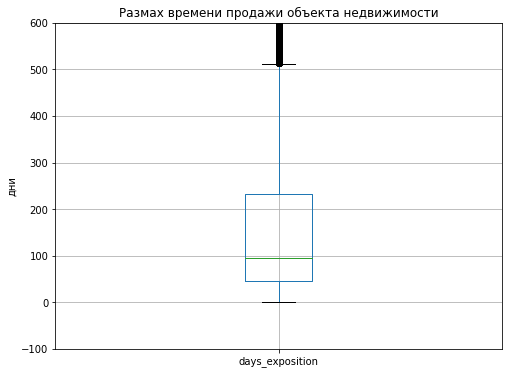

In [71]:
# Строим диаграмму размаха времени продажи объекта недвижимости
df.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

In [72]:
# Все, что выше этого значения - это выбросы
print(q3 + 1.5 * iqr)

512.5


In [73]:
# Убираем выбросы
data_update = df.query('days_exposition < 510')

# Проверим длину датафрейма
len(data_update)

18689

Вывод:

Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы

# Построим графики, которые покажут зависимость цены объекта от разных параметров

In [74]:
# Выведем названия столбцов
data_update.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_one_square_meter',
       'exposition_weekday', 'exposition_month', 'exposition_year',
       'floor_category', 'city_centers_nearest_km'],
      dtype='object')

In [75]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']

In [76]:
# Список с названиями параметров
corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

# Получаем матрицу корреляции
corr_matrix = data_update[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,last_price,total_area,rooms,city_centers_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.629592,0.341817,-0.167269,0.005199,0.003645,-0.037625
total_area,0.629592,1.000000,0.755659,-0.192166,0.000045,0.001476,-0.072184
rooms,0.341817,0.755659,1.000000,-0.147353,-0.001016,0.000077,-0.065084
city_centers_nearest,-0.167269,-0.192166,-0.147353,1.000000,0.004374,-0.012282,0.014701
exposition_weekday,0.005199,0.000045,-0.001016,0.004374,1.000000,0.013760,-0.003119
exposition_month,0.003645,0.001476,0.000077,-0.012282,0.013760,1.000000,-0.222548
exposition_year,-0.037625,-0.072184,-0.065084,0.014701,-0.003119,-0.222548,1.000000


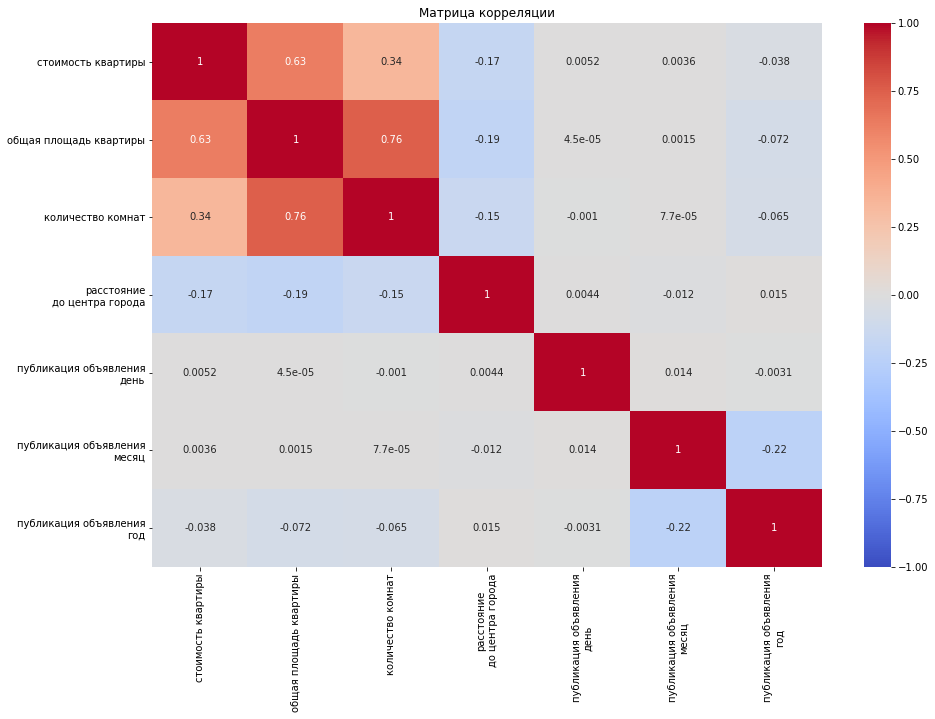

In [77]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels)
plt.title('Матрица корреляции')
plt.show()

Вывод:

Видно, что наибольшая положительная линейная связь между стоимостью квартиры и ее площадью. Зависимость прямопропорциональная - чем больше стоимость квартиры, тем больше ее площадь. Положительная линейная связь отмечается также между стоимостью квартиры и количеством комнат. Связь отличается примерно в 2 раза от связи между стоимостью квартиры и площадтю. Соответственно чем количество комнат больше, тем больше стоимость квартиры. Слабую отрициательную линейную связь можно заметить между стоимостью квартиры и расстоянием до центра города. Чем меньше расстояние до центра, тем больше стоимость квартиры. Между стоимостью квартиры и днем недели, месяцем или годом размещения объявления также отсутствует линейная связь

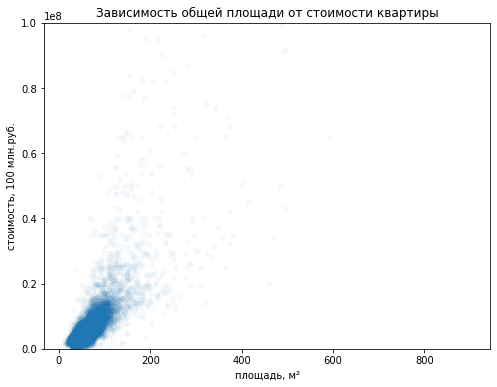

In [78]:
# используем тип графика scatter
data_update.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 150 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена

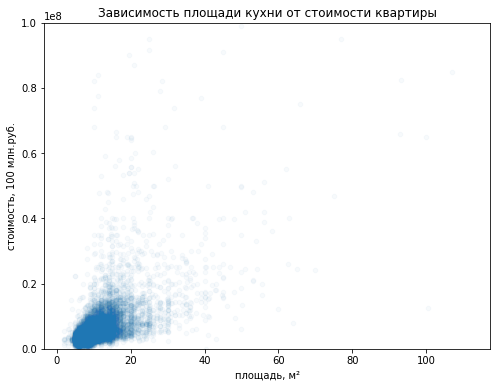

In [79]:
# используем тип графика scatter
data_update.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.03)

plt.title('Зависимость площади кухни от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 18 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость

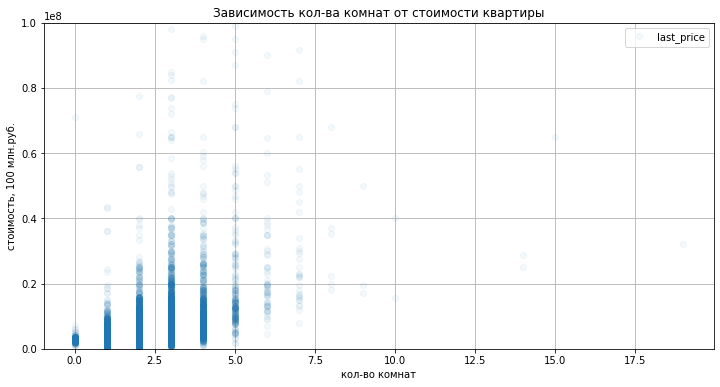

In [80]:
data_update.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.05)
plt.title('Зависимость кол-ва комнат от стоимости квартиры')
plt.xlabel('кол-во комнат')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

По графика можно отметить, что больше всего данных для квартир стоимостью до 20 млн. руб и кол-вом комнат от 1 до 3. Для этого диапазона: с учеличение числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Это можно объяснить тем, что в старом фонде есть 5-ти комнатные квартиры с маленькой площадью комнат

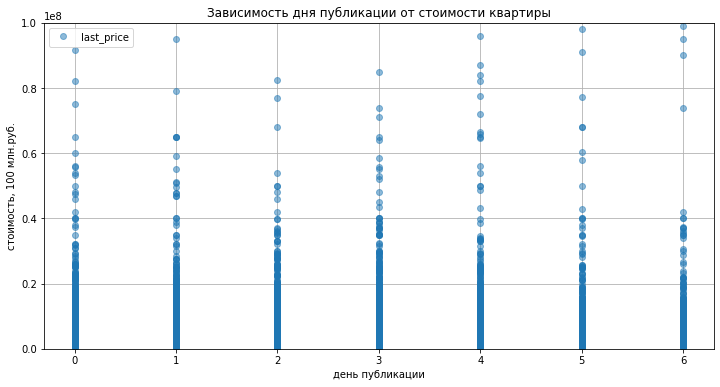

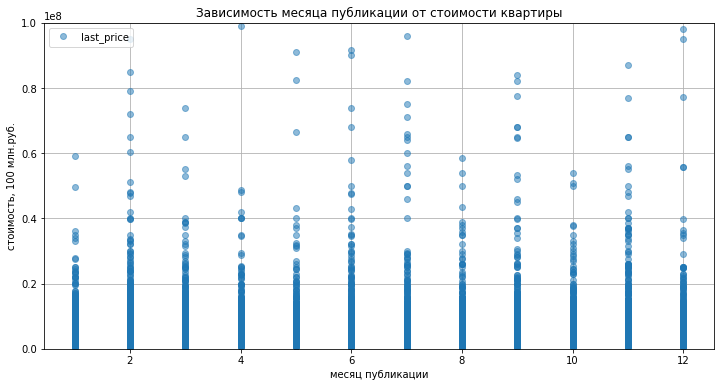

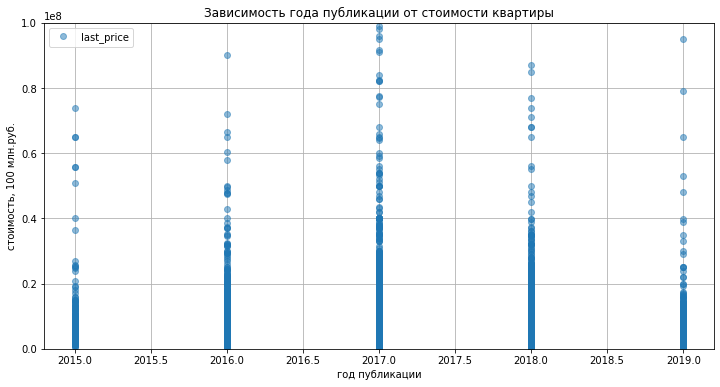

In [81]:
# график дня недели от стоимости
data_update.plot(x = 'exposition_weekday', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

# график месяца от стоимости
data_update.plot(x = 'exposition_month', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

#график года от стоимости
data_update.plot(x = 'exposition_year', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. Также из ранее построенной матрицы корреляции видно, что Коэффициенты корреляции отрицательные и близки к нулю

,mean,count,median
floor_category,,,
другой,6.220322e+06,13924,4650000
первый,4.450555e+06,2227,3800000
последний,6.810154e+06,2538,4200000


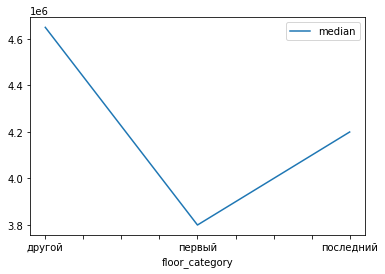

In [82]:
# Создаем сводную таблицу
pivot_table_floor_category = data_update.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot(y = 'median', legend=True)
#Выводим
pivot_table_floor_category

Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа

Вывод:

На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> В целом все отлиично. Определены параметры, сильнее всего влияющие на цену квартиры

# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [83]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10_localities = data_update['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      12375
посёлок Мурино         514
Кудрово                404
посёлок Шушары         387
Всеволожск             308
Колпино                293
посёлок Парголово      287
Пушкин                 276
Гатчина                244
Выборг                 191
Name: locality_name, dtype: int64

In [84]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10_localities_pivot = data_update.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,111705.522469
Пушкин,101936.484457
Кудрово,94489.452327
посёлок Парголово,89192.878502
посёлок Мурино,85909.003366
посёлок Шушары,77769.604444
Колпино,74768.674642
Всеволожск,68605.620519
Гатчина,68065.179549


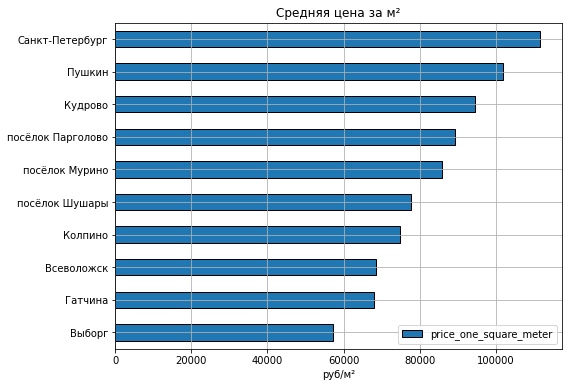

In [85]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Вывод:

Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111722р), что логично. Следом по стоимости идет Пушкин(101894р), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге(57011р)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Идеально

# Найдем, как стоимость объектов зависит от расстояния до центра города (СПБ)

In [86]:
# выберем только Санкт-Петербург
df_spb = data_update.query('locality_name == "Санкт-Петербург"')

In [87]:
# Посмотрим получившийся df
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,590.0,1.0,296.0,19.0,119230.77,5,11,2017,другой,14.0


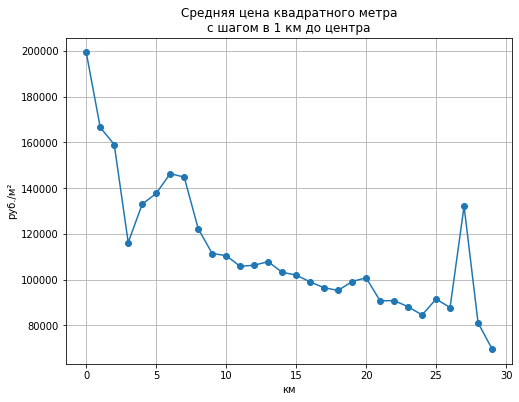

In [88]:
# Рассчитаем среднюю цену квадратного метра до центра
(
df_spb
    .pivot_table(index='city_centers_nearest_km', values='price_one_square_meter')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Из графика можно заметить, что после 8-го километра форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27 км - возможен из-за жилья элитного класса

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно

### Напишите общий вывод

*Общий вывод:*



Наибольшее влияние на стоимость квартиры оказывает её площадь:
Чем больше площадь квартиры, тем выше её стоимость. Чем больше комнат, тем выше стоимость. Чем ближе квартира располагается к центру, тем выше ее стоимость. По результатам исследования приняли, что зона центра города распространяется примерно на 8 км

Было получено представление о типичном объекте недвижимости:

Квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11-16 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров

Также установлено:

Ожидаемое время продажи объекта недвижимости ~ от 45 до 231 день.
Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 111 722 руб./м² (топ-10 населенных пунктов по количеству объявлений)
Самая низкая средняя стоимость квадратного метра в Выборге - 57 011 руб./м² (топ-10 населенных пунктов по количеству объявлений)

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Итоговый вывод полнсостью отражает проделанную работу

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.